In [1]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

In [346]:
start_plot = True
frq_min = 0.8/(6*np.pi) 
frq_max = 1.1/(6*np.pi)
wvl_max = 1/frq_min
wvl_min = 1/frq_max
nfreq = 5000
fcen = (frq_min + frq_max)/2
df = frq_max - frq_min
dfp = 1/3

In [347]:
dpml = np.floor(0.5*wvl_max)+1

dA = 2
dB = 3
epsilonA = 12
epsilonB = 3

NAB = 20

sz = 4*dpml+(dA+dB)*NAB

resolution = 50 # pixels/μm

freg_p = 1
cell_size = mp.Vector3(z=sz)

pml_layers = [mp.PML(thickness=dpml)]
source_z = -0.5*sz+dpml
flux_z = 0.5*sz-dpml
pt = mp.Vector3(z=flux_z-0.5)

In [348]:
def BlockAB(N, center):
    geometry = []
    for i in range(N):
        geometry = np.append(geometry, mp.Block(mp.Vector3(mp.inf,mp.inf,dA),
                     center=mp.Vector3(z=center-(dA+dB)*N/2 + (dA+dB)*i + dA/2),
                     material=mp.Medium(epsilon=epsilonA)))
        geometry = np.append(geometry, mp.Block(mp.Vector3(mp.inf,mp.inf,dB),
                     center=mp.Vector3(z=center-(dA+dB)*N/2 + (dA+dB)*i + dA + dB/2),
                     material=mp.Medium(epsilon=epsilonB)))
    geometry = geometry.tolist()
    return geometry

In [349]:
def BlockBA(N, center):
    geometry = []
    for i in range(N):
        geometry = np.append(geometry, mp.Block(mp.Vector3(mp.inf,mp.inf,dB),
                     center=mp.Vector3(z=center-(dA+dB)*N/2 + (dA+dB)*i + dB/2),
                     material=mp.Medium(epsilon=epsilonB)))
        geometry = np.append(geometry, mp.Block(mp.Vector3(mp.inf,mp.inf,dA),
                     center=mp.Vector3(z=center-(dA+dB)*N/2 + (dA+dB)*i + dB + dA/2),
                     material=mp.Medium(epsilon=epsilonA)))
    geometry = geometry.tolist()
    return geometry

In [350]:
sources = [mp.Source(mp.GaussianSource(fcen,fwidth=df),
                     component=mp.Ex,
                     center=mp.Vector3(z=source_z),
                     size=mp.Vector3())]
geometry = sum([BlockAB(10,-10*(dA+dB)/2),BlockBA(10,10*(dA+dB)/2)],[])

In [351]:
sim_vac = mp.Simulation(cell_size=cell_size,
                    resolution=resolution,
                    boundary_layers=pml_layers,
                    dimensions=1,
                    sources=sources)
tran_fr = mp.FluxRegion(center=mp.Vector3(z=flux_z))
tran = sim_vac.add_flux(fcen, df*dfp, nfreq, tran_fr)

In [352]:
sim_vac.run(until_after_sources=mp.stop_when_fields_decayed(50,mp.Ex,pt,1e-3))

-----------
Initializing structure...
time for choose_chunkdivision = 0.000546932 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 148 with resolution 50
time for set_epsilon = 0.00806189 s
-----------
field decay(t = 150.02): 2.0008681918797941e-10 / 2.0008681918797941e-10 = 1.0
field decay(t = 200.03): 1.5889570764339132e-07 / 1.5889570764339132e-07 = 1.0
field decay(t = 250.04): 3.373208245361826e-05 / 3.373208245361826e-05 = 1.0
field decay(t = 300.04): 0.001981443353868565 / 0.001981443353868565 = 1.0
field decay(t = 350.05): 0.03386157020847822 / 0.03386157020847822 = 1.0
field decay(t = 400.06): 0.1684385106513797 / 0.1684385106513797 = 1.0
field decay(t = 450.07): 0.25000182414745736 / 0.25000182414745736 = 1.0
field decay(t = 500.08): 0.2265009258374674 / 0.25000182414745736 = 0.9059970926606977
field decay(t = 550.08): 0.07459786345810182 / 0.25000182414745736 = 0.2983892766082464
field decay(t = 600.09): 0.0071517420370621 / 0.25000182414745736 = 0.02860675941645859

In [353]:
vac_flux = mp.get_fluxes(tran)

In [354]:
sim = mp.Simulation(cell_size=cell_size,
                    resolution=resolution,
                    boundary_layers=pml_layers,
                    sources=sources,
                    dimensions=1,
                    geometry=geometry)
tran = sim.add_flux(fcen, df*dfp, nfreq, tran_fr)

In [355]:
sim.run(until_after_sources=mp.stop_when_fields_decayed(50,mp.Ex,pt,1e-3))

-----------
Initializing structure...
time for choose_chunkdivision = 0.000570059 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 148 with resolution 50
     block, center = (0,0,-49)
          size (1e+20,1e+20,2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (0,0,-46.5)
          size (1e+20,1e+20,3)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (3,3,3)
     block, center = (0,0,-44)
          size (1e+20,1e+20,2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (0,0,-41.5)
          size (1e+20,1e+20,3)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (3,3,3)
     block, center = (0,0,-39)
          size (1e+20,1e+20,2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (0,

In [356]:
if start_plot:
    wl=[]
    Ts=[]

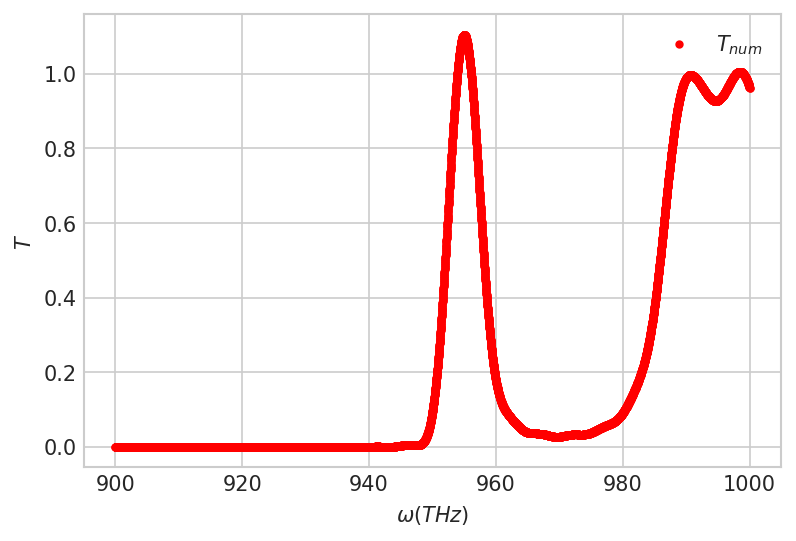

In [361]:
tran_flux = mp.get_fluxes(tran)
flux_freqs = mp.get_flux_freqs(tran)
for i in range(nfreq):
    wl = np.append(wl, 2*flux_freqs[i]*np.pi*3*10**3)
    Ts = np.append(Ts,tran_flux[i]/vac_flux[i])    

if mp.am_master():
    plt.figure(dpi=150)
    plt.plot(wl,Ts,'r.',label='$T_{num}$')
    plt.xlabel(r'$\omega(THz)$')
    plt.ylabel('$T$')
    plt.legend(loc="upper right")
    plt.savefig('Tasks_2_4(10)_r_peak.png')
    plt.show()    

In [358]:
print(sz)
print(dpml)
print(wvl_max)
print(wvl_min)

148.0
12.0
23.561944901923447
17.135959928671596


In [359]:
print(source_z)
print(flux_z)

-62.0
62.0


In [360]:
np.max(Ts)

1.1038943161896715